In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.value_counts().sum()

10000

In [5]:
len(dataset.columns)

10

In [6]:
#Thompson sampling implementation start

In [7]:
N = dataset.value_counts().sum()
d = len(dataset.columns)

In [8]:
#empty list for appending the ads selected by each round
ads_selected = []

In [9]:
#lists for accomodating the number of times a particular ad gets selected up to round N
number_reward_1 = [0] * d
number_reward_0 = [0] *d

In [10]:
#initial total reward, accumulated over N rounds
total_reward = 0

In [11]:
import random

In [12]:
for n in range (0,N):
    ad = 0
    max_random = 0
    for i in range (0,d):
        random_theta = random.betavariate(alpha = number_reward_1[i] + 1, beta = number_reward_0[i] + 1)
        if random_theta > max_random:
            max_random = random_theta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward == 1:
        number_reward_1[ad] += 1
    else:
        number_reward_0[ad] += 1
    total_reward += reward

Text(0, 0.5, 'number of times each ad was selected over all the rounds')

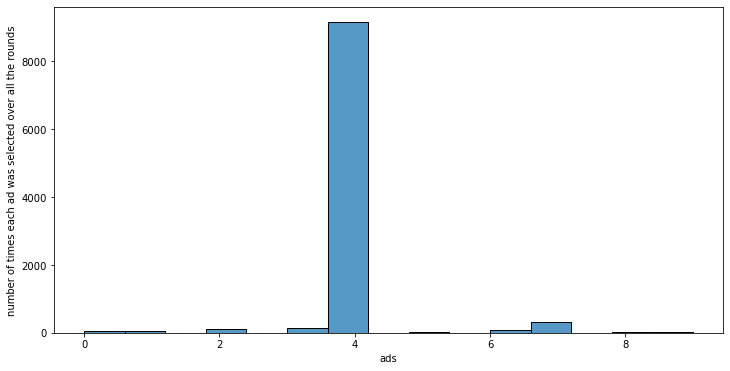

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=ads_selected)
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected over all the rounds')

Text(0, 0.5, 'number of times each ad was selected over all the rounds')

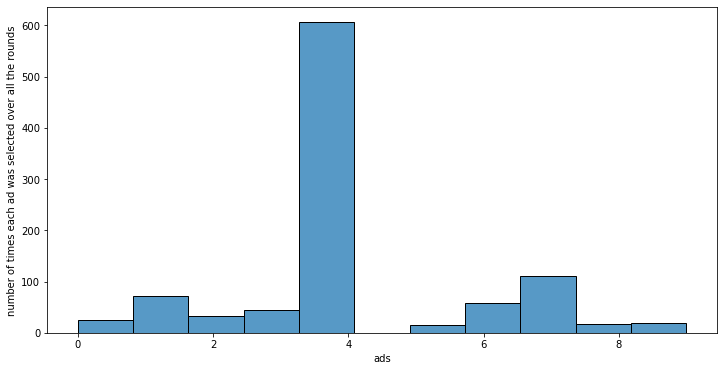

In [14]:
#check for lower number of rounds
N = 1000
d = len(dataset.columns)
ads_selected = []
number_reward_1 = [0] * d
number_reward_0 = [0] * d
total_reward = 0

for n in range (0,N):
    ad = 0
    max_random = 0
    for i in range (0,d):
        random_theta = random.betavariate(alpha = number_reward_1[i] + 1, beta = number_reward_0[i] + 1)
        if random_theta > max_random:
            max_random = random_theta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward == 1:
        number_reward_1[ad] += 1
    else:
        number_reward_0[ad] += 1
    total_reward += reward
    
plt.figure(figsize=(12,6))
sns.histplot(data=ads_selected)
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected over all the rounds')